<div style="width:image width px; font-size:75%; text-align:right;">
    <img src="img/header_letizia-bordoni_unsplash.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Photo by Letizia Bordoni on Unsplash</figcaption>
</div>

# A/B-testing trials
**Development of the theoretical basis for statistical hypothesis testing with calculation of sample data sets**

*Dennis Gluesenkamp*

## Table of contents
* [Introduction and motivation](#introduction)
* [Theoretical background](#theory)
* [Arithmetic approaches](#arithmetic)
    * [Self-implementation](#arithmetic_selfimplementation)
    * [SciPy implementation](#arithmetic_scipy)
* [Study of model cases](#study)
    * [Supermarket](#study_supermarket)
    * [Wholesale](#study_wholesale)
* [References](#references)

## Introduction and motivation<a class="anchor" id="introduction"></a>

<table class="image styled" style="margin-left: 0.5em" cellspacing="0" cellpadding="0" align="right">
    <tbody><tr><td><img src="img/intro_jon-tyson_unsplash.jpg" width="width" height="height" ></td></tr>
        <tr><td class="caption">Photo by Jon Tyson on Unsplash</td></tr>
    </tbody>
</table>

The comparison of two groups with respect to a specific effect is of great interest in a variety of fields and applications. Here are just a few examples:
* The design of a webshop is checked between two alternatives in order to increase the conversion of visitors into customers. Exemplary question: *Do you want the button to buy to be red or blue?*
* The effectiveness of a drug is checked on the basis of two study groups, in which one group is given the drug and the other a placebo. The question: *Does the drug really influence the course of the disease?
* Educational and career trajectories are compared in relation to socio-demographic factors. Exemplary question: *Do girls or boys achieve better results at school?*

Especially in the field of marketing, website design or sales approach, this procedure is called **A/B testing**. This means that there are two groups of generally speaking customers who are presented different versions of a certain product, presentation or similar between the groups. Customer behavior is then compared in terms of a success metric, such as signing a contract, purchasing or providing contact information. As a result, the provider or operator receives a clear decision support as to which version should be implemented for the future in order to maximize the addressed success. In the following the basics will be worked out and some simple examples will be calculated. The central question will be whether the observed difference between the groups can be described as **significant**. For this purpose, the **t-** respectively **Welch-test** will be introduced.

## Theoretical background<a class="anchor" id="theory"></a>
### Hypotheses<a class="anchor" id="theory_hypotheses"></a>
If the comparison of two groups shows a difference in the measurable quantity, we want to know whether this difference is due to group membership or whether it is random. To stay with an example from the introduction: Is a higher turnover achieved with the red button due to the color of the button or is this difference to the blue button purely coincidental. To answer this question, hypotheses are formulated. The so-called **null hypothesis** describes the case that we want to reject on the basis of our experiment: The expected values of the measured variable are actually the same $\mu_1 = \mu_2 = \mu$ because both samples are from the same population, although the sample means are different $\bar{x}_1 \neq \bar{x}_2$. The statement disjoint to the null hypothesis is the **alternative hypothesis**. In this case it can be assumed that the samples are taken from different distributions with different expected values $\mu_1 \neq \mu_2$ with respect to the measurand. Hence, it explains the difference between the empirical sample means $\bar{x}_1 \neq \bar{x}_2$. The following chart is explaining these cases with samples from the same distribution on the left hand side and two different distributions with two different expected values on the right hand side.

<tr>
    <td><img src="img/nullhypothesis.png" style="width:85%;"/></td>
    <td><img src="img/alternativehypothesis.png" style="width:85%;"/></td>
</tr>

### Statistical testing<a class="anchor" id="theory_testing"></a>
In order to test the null hypothesis and to make a statement whether the difference in the observed empirical mean values is significant, a statistical hypothesis test is performed. If we now look at exactly two groups/samples with a sample mean difference in the relevant measured variable, we apply the **t-test**.

> *The t-test checks whether two means differ significantly from each other.* [[1, p.103]](#schaefer2011)

Significant means that there is sufficient statistical evidence *to reject the null hypothesis*. However, the reverse conclusion does not apply: If the difference is not significant, the null hypothesis is *not* proven.

The t-test requires certain criteria to be met for appropriate use. These are [[1, p.113]](#schaefer2011):
* The samples are independent, so the two groups do not influence each other's behavior.
* The dependent variable, i.e. the measurand, is interval scaled.
* The dependent variable is normally distributed.
* The variances are (almost) equal.

<a class="anchor" id="violation"></a>However, the t-test is a robust test - it returns meaningful results even if these criteria are violated. Especially noteworthy is the normal distribution of the dependent variable. In some publications, the use of the non-parametric **Wilcoxon-Mann-Whitney test** is directly recommended when the normal distribution is violated. However, studies like Rasch & Guiard [[2]](#rasch2004) show that this is not necessarily the case.

> *On the other hand the t-test is so robust against non-normality that there is nearly no need to use the Wilcoxon test. [...]  Generally  the  results are such that in most practical cases the parametric approach for inferences about means is so robust that it can be recommended in nearly all applications.* [[2]](#rasch2004)

In our case of independent/unpaired and exactly two samples, the **test statistic $t$** is calculated as follows [[3, p.86](#semendjajew2003); [4, p.8](#kanji2006)].
\\[
    t = \frac{\bar{x}_A-\bar{x}_B}{\sqrt{\left(n_A-1\right) s_A^2 + \left(n_B-1\right) s_B^2}} \sqrt{\frac{n_a+n_b-2}{\frac{1}{n_A} + \frac{1}{n_B}}} \label{eq:tstatistic}\tag{1}
\\]
Here, $A$ and $B$ are denoting the samples. In the equation above, the **sample/empirical mean $\bar{x}$** is [[3, p.79]](#semendjajew2003)
\\[
    \bar{x} = \frac{1}{n} \sum_i^n x_i
\\]
with $n$ as the sample size and $x_i$ as the individual sample values. The **unbiased sample variance $s^2$** is [[3, p.80]](#semendjajew2003)
\\[
    s^2 = \frac{1}{n-1} \sum_i^n \left(x_i - \bar{x} \right).
\\]

In cases where the variances are different $\sigma_1 \neq \sigma_2$ the **Welch test** is to be preferred [[5, p.208]](#benesch2012). The test statistic changes to [[6]](#welch1947)
\\[
    t = \frac{\bar{x}_A-\bar{x}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}. \label{eq:welchtest}\tag{2}
\\]

### Significance<a class="anchor" id="theory_significance"></a>
Finally, we define a critical value $\alpha$ from which we can reject the null hypothesis with good reason, which is our actual goal. A significance level is defined for this purpose. If the probability of committing a type I error, i.e. rejecting the null hypothesis even though it actually applies, falls below this level, the null hypothesis is rejected and this is called significant.

How exactly $\alpha$ should be chosen has often been the subject of research and is still debated. It should also be considered what it means to falsely reject the null hypothesis. Typically, tests with error probabilities below 5% are considered significant. As we will look at examples with no further implications in the following, we will also adopt this value, so $\alpha = 0.05$. This means, if the null hypothesis is true, the probability of rejecting must not exceed 5%.

In order to determine whether we can describe a mean difference as significant, we must calculate a measure of the confidence of the null hypothesis and compare it with the level of significance. This measure indicates the probability that the observed value or a value even further in the direction of the alternative hypothesis (in our case, a larger difference in sample means) occurs, but that the null hypothesis corresponds to reality. It thus indicates the degree of support for the null hypothesis. If it is below our previously defined significance level, we consider the test result to be significant. This probability measure is called **p-value**.
\\[
    p = 2 \left( 1 - F\left(\left|t\right|,\nu\right) \right) \label{eq:pvalue}\tag{3}
\\]
Since the test statistics follow a Student's t-distribution, its cumulative distribution function $F\left(\left|t\right|,\nu\right)$ is used to calculate the p-value, with degrees of freedom $\nu=n_A+n_B-2$. The two-sided distribution is used because one empirical mean value can be greater or smaller than the other sample mean by the same margin. For further information on the cumulative distribution function $F\left(\left|t\right|,\nu\right)$ - shown in the chart below - please refer to the literature, for instance [[7]](#johnson2005).

<div style="width:image width px; font-size:75%; text-align:right;">
    <img src="img/cdf.png" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Cumulative distribution function of Student's t-distribution</figcaption>
</div>

## Arithmetic approaches<a class="anchor" id="arithmetic"></a>
To realize the test we want to try different ways. On the one hand, we will implement our own methods in the following, which will calculate the corresponding test statistics. Above all, this will allow an exact reconstruction of the calculation path and thus will also help to understand the technique. Furthermore, we examine calculations for the t-test, which are offered in third-party packages for Python and can thus be used as an out of the box solution for hypothesis testing.

### Self-implementation<a class="anchor" id="arithmetic_selfimplementation"></a>
For our own implementation of the test statistic $t$ we only use NumPy [[8](#oliphant2006); [9](#walt2011)].

In [1]:
import numpy as np

The sample means $\bar{x}$ can be calculated on an array with the [``mean()`` function](#https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html). The unbiased sample variance $s^2$ is implemented in NumPy's [``var()`` function](#https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html). The *Delta Degrees of Freedom* parameter has to be taken into account at this point. The default value is ``ddof = 0``. For an unbiased sample variance this has to be set to ``ddof = 1``. Finally, we need the [``sqrt()`` function](#https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html) which leads us to the following function to calculate the test statistic $t$ of equation ([1](#mjx-eqn-eq:tstatistic)).

In [2]:
def tValue(A, B):
    n_A = len(A)
    n_B = len(B)
    m_A = A.mean()
    m_B = B.mean()
    s_A = A.var(ddof = 1)
    s_B = B.var(ddof = 1)
    
    return (m_A-m_B)/(np.sqrt((n_A-1)*s_A + (n_B-1)*s_B)) * np.sqrt((n_A+n_B-2)/((1/n_A)+(1/n_B)))

We also define a function to calculate the Welch's t-test according to ([2](#mjx-eqn-eq:welchtest)).

In [3]:
def tValueWelch(A, B):
    n_A = len(A)
    n_B = len(B)
    m_A = A.mean()
    m_B = B.mean()
    s_A = A.var(ddof = 1)
    s_B = B.var(ddof = 1)
    
    return (m_A-m_B)/(np.sqrt(s_A/n_A + s_B/n_B))

To calculate the p-value we use the implementation of [Student's t distribution](#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) in the module ``stats`` of the SciPy package.

In [4]:
from scipy import stats

This makes the code to ([3](#mjx-eqn-eq:pvalue)) look like this:

In [5]:
def tpValue(t, nu):
    return 2*(1-stats.t.cdf(abs(t), nu))

After all we combine the two function to a single one which gives a the test statistic and the p-value for two samples $A$ and $B$.

In [6]:
def tTest(A, B):
    return tValue(A, B), tpValue(tValue(A, B), len(A)+len(B)-2)

def WelchtTest(A, B):
    return tValueWelch(A, B), tpValue(tValueWelch(A, B), len(A)+len(B)-2)

### SciPy implementation<a class="anchor" id="arithmetic_scipy"></a>
While the own implementation is helpful for learning purposes, there is also an out of the box solution in the SciPy package [[10]](#virtanen2020). The [function ``ttest_ind()``](#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) calculates test statistic and p-value in a two-sided test for the null hypothesis that two unpaired samples have identical expected values.

In [7]:
# Example: Two samples of random numbers, normally distributed
A = stats.norm.rvs(loc = 0, scale = 1, size = 100)
B = stats.norm.rvs(loc = 0, scale = 1, size = 100)
stats.ttest_ind(A, B)

Ttest_indResult(statistic=0.029365614959845927, pvalue=0.9766025739936632)

In [8]:
# Check the result of our own implementation
tTest(A, B)

(0.029365614959845923, 0.9766025739936635)

In order to perform a Welch's t-test, the parameter ``equal_var`` has to be set to ``False``.

In [9]:
# Example: Two samples of random numbers, normally distributed, different variances and sizes
A = stats.norm.rvs(loc = 10, scale = 1, size = 100)
B = stats.norm.rvs(loc = 10, scale = 7, size = 500)
print('Result t-test:         ' + str(stats.ttest_ind(A, B)))
print('Result Welch\'s t-test: ' + str(stats.ttest_ind(A, B, equal_var = False)))

Result t-test:         Ttest_indResult(statistic=0.16224118420345374, pvalue=0.8711707334728814)
Result Welch's t-test: Ttest_indResult(statistic=0.3440587883785998, pvalue=0.7309261297944623)


In [10]:
# Check the result of our own implementation
print('Result t-test:         ' + str(tTest(A, B)))
print('Result Welch\'s t-test: ' + str(WelchtTest(A, B)))

Result t-test:         (0.16224118420345376, 0.8711707334728813)
Result Welch's t-test: (0.3440587883785998, 0.7309230218886178)


## Study of model cases<a class="anchor" id="study"></a>
In the following, data sets will be evaluated in the sense of an A/B test. Since corresponding data is not always available, the data sets used below show at least two groups with different behavior, but which were not originally created as an A/B test. However, we pretend that an A/B test has been performed and we will now identify the favorable option. We set the significance level to $\alpha = 0.05$ in all cases.

Additionally, we make use of the packages ``pandas`` and ``matplotlib``.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<hr>

<a class="anchor" id="study_supermarket"></a>
<div style="width:image width px; font-size:75%; text-align:right;">
    <img src="img/supermarket_neonbrand_unsplash.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Photo by NeONBRAND on Unsplash</figcaption>
</div>

### Supermarket
**Pretended case:** In a supermarket, two groups of customers have received a different service (We do not define further in which way, such as personal greetings or similar). One group are <span style="color:#003f7e">registered customers</span> (hereafter also called <span style="color:#003f7e">blue group</span>), i.e. members who have experienced a new service offering. The other group of <span style="color:#821626">normal buyers</span> is the control group (hereafter also called <span style="color:#821626">red group</span>), with the current standard of service. For the two groups, both goods and their prices are the same. The two service levels have been tested over different locations and the customers' shopping experience has been evaluated (rating).

**Question: Does the changed service have a positive effect on customer satisfaction and sales figures and should it therefore be introduced across all markets?**

**Source:** Pyae, A. (2019). Supermarket sales, Historical record of sales data in 3 different supermarkets. *Kaggle*. Retrieved 2020/04/07 from https://www.kaggle.com/aungpyaeap/supermarket-sales

#### Data import and column selection
First, the data is imported as a pandas ``DataFrame`` and a selection of columns is made that is appropriate for the pretense.

In [12]:
df_supermarket = pd.read_csv('dat/supermarket/supermarket.csv')
df_supermarket.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
103,212-62-1842,A,Yangon,Normal,Male,Food and beverages,58.26,6,17.4780,367.0380,3/28/2019,16:44,Cash,349.56,4.761905,17.4780,9.9
420,266-76-6436,C,Naypyitaw,Member,Female,Food and beverages,38.60,3,5.7900,121.5900,3/28/2019,13:57,Ewallet,115.80,4.761905,5.7900,7.5
854,160-22-2687,A,Yangon,Member,Female,Health and beauty,95.95,5,23.9875,503.7375,1/23/2019,14:21,Ewallet,479.75,4.761905,23.9875,8.8
811,380-60-5336,A,Yangon,Normal,Female,Electronic accessories,40.26,10,20.1300,422.7300,2/24/2019,18:06,Credit card,402.60,4.761905,20.1300,5.0
833,528-14-9470,A,Yangon,Member,Male,Health and beauty,91.30,1,4.5650,95.8650,2/14/2019,14:42,Ewallet,91.30,4.761905,4.5650,9.2


Of central importance are the columns ``Customer type`` for the test and control group as well as the columns for the total price of the purchase ``Total`` and the customer satisfaction ``Rating``.

Furthermore, we consider the following columns to make the case more vivid/realistic. These columns are therefore also included:
* ``Branch``
* ``Gender``
* ``Product line``
* ``Payment``
* ``Rating``

We will not use the ``Invoice ID`` because no purchase identified by an individual ID contains multiple products in this sample. To do this, we will check the length of the dataset with the number of unique IDs.

In [13]:
if (len(df_supermarket['Invoice ID'].unique()) == len(df_supermarket['Invoice ID'])):
    print('IDs contain only one row with one individual product. Please proceed!')
else:
    print('IDs can contain more than one individual item. Please aggregate the data.')

IDs contain only one row with one individual product. Please proceed!


The ``Customer type`` column should contain only two groups (we want to apply the t-test, not an analysis of variance) and the columns for the total purchase price ``Total`` and the customer satisfaction ``Rating`` should contain numerical values. We check that this is the case.

In [14]:
if (len(df_supermarket['Customer type'].unique()) == 2):
    print('There are only two groups ' + str(df_supermarket['Customer type'].unique()) + ' as demanded.')
else:
    print('There are not exactly two groups! Please check the data.')
    
print('There are ' + str(len(df_supermarket[df_supermarket['Customer type'] == 'Member'])) + ' members in the dataset.')
print('There are ' + str(len(df_supermarket[df_supermarket['Customer type'] == 'Normal'])) + ' normal buyers in the dataset.')

if ((df_supermarket['Total'].dtype == 'float64') & (df_supermarket['Rating'].dtype == 'float64')):
    print('The considered objective columns are numeric (float64). Please proceed!')
else:
    print('Check the type of the objective columns.')
    
print(df_supermarket.isnull().sum())

There are only two groups ['Member' 'Normal'] as demanded.
There are 501 members in the dataset.
There are 499 normal buyers in the dataset.
The considered objective columns are numeric (float64). Please proceed!
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


As we can see, there are only the test and control group. The sizes of the group are almost equal. Furthermore, the measurands are floats and there is no missing data.

#### Total purchase price
We start by looking at the distribution of the total purchase price as a histogram for the two groups. For the sake of simplicity, we inspect here purely from a visual point of view using the histogram and do not further quantify the similarity.

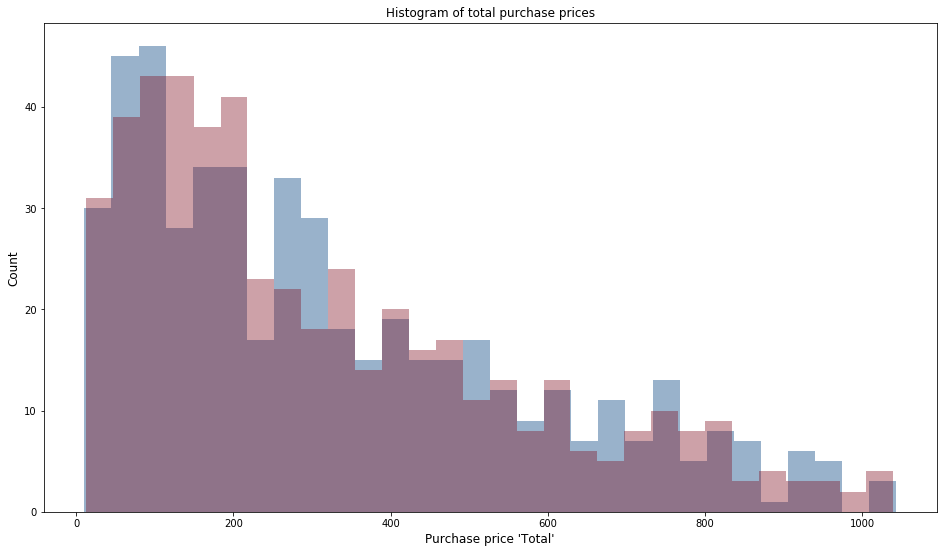

In [15]:
plt.figure(figsize=(16, 9))
plt.hist(df_supermarket[df_supermarket['Customer type'] == 'Member']['Total'],
         alpha = 0.4, bins = 30, color = '#003f7e')                                 # members = blue group
plt.hist(df_supermarket[df_supermarket['Customer type'] == 'Normal']['Total'],
         alpha = 0.4, bins = 30, color = '#821626')                                 # members = red group
plt.xlabel("Purchase price 'Total'", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Histogram of total purchase prices")
plt.show()

In [16]:
print('Mean of members: ' + str(df_supermarket[df_supermarket['Customer type'] == 'Member']['Total'].mean()))
print('Mean of normals: ' + str(df_supermarket[df_supermarket['Customer type'] == 'Normal']['Total'].mean()))

Mean of members: 327.7913053892216
Mean of normals: 318.122855711423


We can see that the distributions of the dependent variable ``Total`` are not normally distributed, rather left-skewed, and therefore violate one of the preconditions. However, as described [earlier](#violation), we rely on the robustness of the t-test and proceed. The means differ a bit, so we can check whether this difference is due to the group and therefore service level.

In [17]:
print('Variance of members: ' + str(df_supermarket[df_supermarket['Customer type'] == 'Member']['Total'].var()))
print('Variance of normals: ' + str(df_supermarket[df_supermarket['Customer type'] == 'Normal']['Total'].var()))

Variance of members: 61500.91580485452
Variance of normals: 59488.5760661809


The variances are quite similar, so we stick with the t-test. The hypothesis are:
* **Null hypothesis $H_0$: There is no difference between members and normal buyers in terms of total purchase price.**
* **Alternative hypothesis $H_1$: The difference in the total purchase price sample means results from a different behavior of the two groups and is not random.**

In [18]:
stats.ttest_ind(df_supermarket[df_supermarket['Customer type'] == 'Member']['Total'],
                df_supermarket[df_supermarket['Customer type'] == 'Normal']['Total'])

Ttest_indResult(statistic=0.6215268724928228, pvalue=0.5343949596143621)

With a probability value of $p \approx 0.534$, our chosen significance level $\alpha = 0.05$ has been clearly exceeded. The null hypothesis can therefore not be rejected.

#### Rating
Our second dependent variable is customer satisfaction, the ``Rating`` attribute. Again, we look at the distribution of ratings across the two groups.

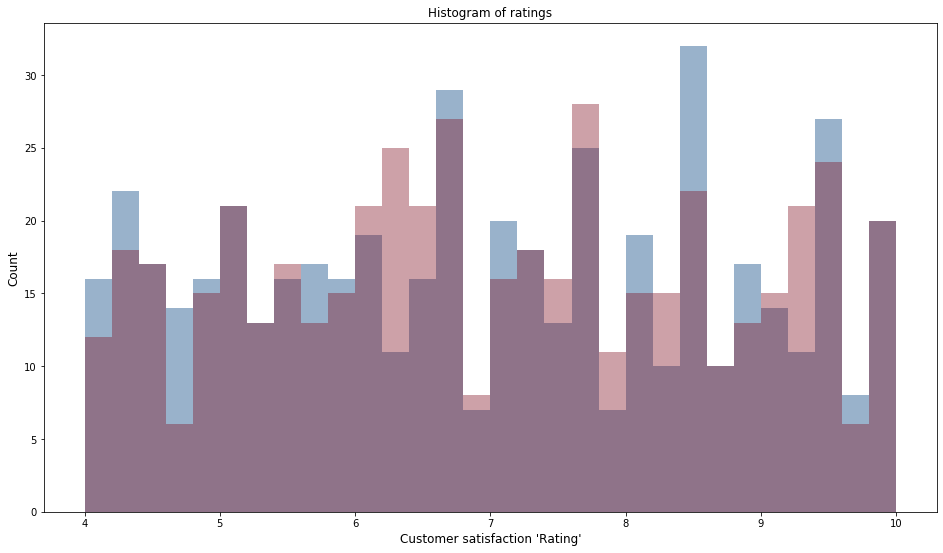

In [19]:
plt.figure(figsize=(16, 9))
plt.hist(df_supermarket[df_supermarket['Customer type'] == 'Member']['Rating'],
         alpha = 0.4, bins = 30, color = '#003f7e')                                 # members = blue group
plt.hist(df_supermarket[df_supermarket['Customer type'] == 'Normal']['Rating'],
         alpha = 0.4, bins = 30, color = '#821626')                                 # members = red group
plt.xlabel("Customer satisfaction 'Rating'", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Histogram of ratings")
plt.show()

In [20]:
print('Mean of members: ' + str(df_supermarket[df_supermarket['Customer type'] == 'Member']['Rating'].mean()))
print('Mean of normals: ' + str(df_supermarket[df_supermarket['Customer type'] == 'Normal']['Rating'].mean()))
print('Variance of members: ' + str(df_supermarket[df_supermarket['Customer type'] == 'Member']['Rating'].var()))
print('Variance of normals: ' + str(df_supermarket[df_supermarket['Customer type'] == 'Normal']['Rating'].var()))

Mean of members: 6.940319361277447
Mean of normals: 7.005210420841684
Variance of members: 3.060331097804394
Variance of normals: 2.850093278927331


So, the distributions do not follow the normal distribution, but we proceed again as above already explained. The average values only differs to a limited extent - and on top with a lower satisfaction value for members. Nevertheless, we check for significance here also. The difference in variance does not cause us to drop t-test. The hypothesis are:
* **Null hypothesis $H_0$: There is no difference between members and normal buyers in terms of customer satisfaction.**
* **Alternative hypothesis $H_1$: The difference in the sample means of the satisfaction rating results from a different customer experience of the two groups and is not random.**

In [21]:
print(stats.ttest_ind(df_supermarket[df_supermarket['Customer type'] == 'Member']['Rating'],
                      df_supermarket[df_supermarket['Customer type'] == 'Normal']['Rating']))

Ttest_indResult(statistic=-0.5968211265254104, pvalue=0.5507621727856713)


Again, with $p = $0.551$, the selected significance level is surpassed. The null hypothesis cannot be rejected.

#### Conclusion
If we look at our initial question (*Does the changed service have a positive effect on customer satisfaction and sales figures and should it therefore be introduced across all markets?*) with regard to the tests just completed, we can state that in the (pretended) case no significant change/improvement could be observed due to the newly introduced service level. Therefore, at least on the basis of this data, we cannot recommend a launch across all markets.

<hr>

<a class="anchor" id="study_wholesale"></a>
<div style="width:image width px; font-size:75%; text-align:right;">
    <img src="img/wholesale_michael-jasmund_unsplash.jpg" width="width" height="height" style="padding-bottom:0.2em;" />
    <figcaption>Photo by Michael Jasmund on Unsplash</figcaption>
</div>

### Wholesale
**Pretended case:** In a wholesale company there are two groups of customers: professional HoReCa which are hotels, restaurant owners, and caterers (hereafter also called <span style="color:#003f7e">blue group</span>) and retail customers (hereafter also called <span style="color:#821626">red group</span>). The respective group is assigned a separate entrance to the stores. All other conditions are the same, such as prices, service levels etc. It should be checked whether the different entrances lead to different sales figures in the departments.

**Question: Does the different entrance to the market cause a different buying behavior and if so, which positioning of the entrance is sales-promoting?**

**Source:** Shekhar, R. (2018). Wholesale customers Data Set, Annual spending in monetary units of clients of a wholesale distributor. *Kaggle*. Retrieved 2020/04/07 from https://www.kaggle.com/binovi/wholesale-customers-data-set

#### Data import and column selection
First, the data is imported as a pandas ``DataFrame`` and a selection of columns is made that is appropriate for the pretense.

In [22]:
df_wholesale = pd.read_csv('dat/wholesale/wholesale.csv')
df_wholesale.drop(['Region'], axis = 1, inplace = True)
df_wholesale.sample(5)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
15,1,10253,1114,3821,397,964,412
177,1,12759,7330,4533,1752,20,2631
221,1,5396,7503,10646,91,4167,239
133,1,9434,1042,1235,436,256,396
358,1,759,18664,1660,6114,536,4100


The dependent variables are ``Fresh`` to ``Delicassen`` [sic, author's note: We write "delicatessen" in the text and keep the attribute name] and the independet test and control group is assigned as ``Channel`` with <span style="color:#003f7e">HoReCa = 1</span> and <span style="color:#821626">Retail = 2</span>. The attribute ``Region`` is not of interest and is deleted

In [23]:
if (len(df_wholesale['Channel'].unique()) == 2):
    print('There are only two groups ' + str(df_wholesale['Channel'].unique()) + ' as demanded.')
else:
    print('There are not exactly two groups! Please check the data.')
    
print('There are ' + str(len(df_wholesale[df_wholesale['Channel'] == 1])) + ' HoReCa customers in the dataset.')
print('There are ' + str(len(df_wholesale[df_wholesale['Channel'] == 2])) + ' retail customers in the dataset.')

if ((df_wholesale['Fresh'].dtype == 'int64') &
    (df_wholesale['Milk'].dtype == 'int64') &
    (df_wholesale['Grocery'].dtype == 'int64') &
    (df_wholesale['Frozen'].dtype == 'int64') &
    (df_wholesale['Detergents_Paper'].dtype == 'int64') &
    (df_wholesale['Delicassen'].dtype == 'int64')
   ):
    print('The considered objective columns are numeric (int64). Please proceed!')
else:
    print('Check the type of the objective columns.')
    
print(df_wholesale.isnull().sum())

There are only two groups [2 1] as demanded.
There are 298 HoReCa customers in the dataset.
There are 142 retail customers in the dataset.
The considered objective columns are numeric (int64). Please proceed!
Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


We can see that the test and control group are the only channels, albeit in varying numbers. Moreover, the measurands are integers and there is no missing data.

#### Sample means, variances and distributions

In [24]:
pd.concat([df_wholesale[df_wholesale.Channel == 1].mean(),
           df_wholesale[df_wholesale.Channel == 2].mean()], axis=1)

,0,1
Channel,1.000000,2.000000
Fresh,13475.560403,8904.323944
Milk,3451.724832,10716.500000
Grocery,3962.137584,16322.852113
Frozen,3748.251678,1652.612676
Detergents_Paper,790.560403,7269.507042
Delicassen,1415.956376,1753.436620


In [25]:
pd.concat([df_wholesale[df_wholesale.Channel == 1].var(),
           df_wholesale[df_wholesale.Channel == 2].var()], axis=1)

,0,1
Channel,0.000000e+00,0.000000e+00
Fresh,1.913156e+08,8.077902e+07
Milk,1.894135e+07,9.369526e+07
Grocery,1.257067e+07,1.504871e+08
Frozen,3.185375e+07,3.286257e+06
Detergents_Paper,1.219023e+06,3.957781e+07
Delicassen,9.906296e+06,3.817323e+06


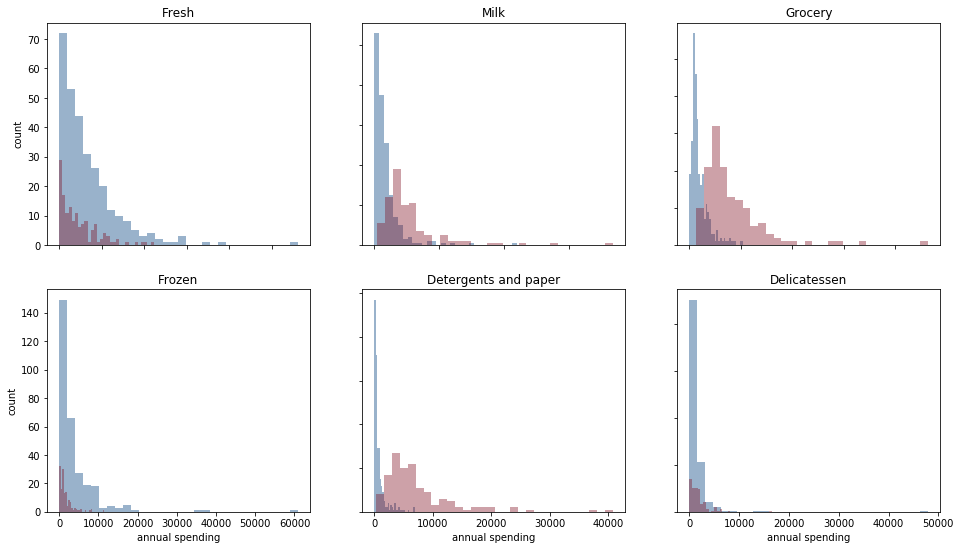

In [26]:
fig, axs = plt.subplots(2, 3, figsize = (16, 9))
axs[0, 0].hist(df_wholesale[df_wholesale.Channel == 1]['Fresh'],
                   alpha = 0.4, bins = 30, color = '#003f7e')
axs[0, 0].hist(df_wholesale[df_wholesale.Channel == 2]['Fresh'],
                   alpha = 0.4, bins = 30, color = '#821626')
axs[0, 0].set_title('Fresh')
axs[0, 1].hist(df_wholesale[df_wholesale.Channel == 1]['Milk'],
                   alpha = 0.4, bins = 30, color = '#003f7e')
axs[0, 1].hist(df_wholesale[df_wholesale.Channel == 2]['Milk'],
                   alpha = 0.4, bins = 30, color = '#821626')
axs[0, 1].set_title('Milk')
axs[0, 2].hist(df_wholesale[df_wholesale.Channel == 1]['Grocery'],
                   alpha = 0.4, bins = 30, color = '#003f7e')
axs[0, 2].hist(df_wholesale[df_wholesale.Channel == 2]['Grocery'],
                   alpha = 0.4, bins = 30, color = '#821626')
axs[0, 2].set_title('Grocery')
axs[1, 0].hist(df_wholesale[df_wholesale.Channel == 1]['Frozen'],
                   alpha = 0.4, bins = 30, color = '#003f7e')
axs[1, 0].hist(df_wholesale[df_wholesale.Channel == 2]['Frozen'],
                   alpha = 0.4, bins = 30, color = '#821626')
axs[1, 0].set_title('Frozen')
axs[1, 1].hist(df_wholesale[df_wholesale.Channel == 1]['Detergents_Paper'],
                   alpha = 0.4, bins = 30, color = '#003f7e')
axs[1, 1].hist(df_wholesale[df_wholesale.Channel == 2]['Detergents_Paper'],
                   alpha = 0.4, bins = 30, color = '#821626')
axs[1, 1].set_title('Detergents and paper')
axs[1, 2].hist(df_wholesale[df_wholesale.Channel == 1]['Delicassen'],
                   alpha = 0.4, bins = 30, color = '#003f7e')
axs[1, 2].hist(df_wholesale[df_wholesale.Channel == 2]['Delicassen'],
                   alpha = 0.4, bins = 30, color = '#821626')
axs[1, 2].set_title('Delicatessen')

for ax in axs.flat:
    ax.set(xlabel='annual spending', ylabel='count')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

The sample means differ in some departments more and in some less. Nevertheless, there is a difference across all products. In addition, the variances are quite substantial and the distributions are not normally distributed. Due to the different sample sizes and the different variances we choose Welch's t-test to check the significance.

#### Hypothesis testing
The hypothesis are:
* **Null hypothesis $H_0$: There is no difference in the resulting sales with regard to a different market entry in the mentioned products.**
* **Alternative hypothesis $H_1$: The difference in the sample means of the sales turnover results from different market entrances for the two groups and is not random.**

In [27]:
print('Fresh:')
print(stats.ttest_ind(df_wholesale[df_wholesale.Channel == 1]['Fresh'],
                      df_wholesale[df_wholesale.Channel == 2]['Fresh'],
                      equal_var = False))
print('- - -')
print('Milk:')
print(stats.ttest_ind(df_wholesale[df_wholesale.Channel == 1]['Milk'],
                      df_wholesale[df_wholesale.Channel == 2]['Milk'],
                      equal_var = False))
print('- - -')
print('Grocery:')
print(stats.ttest_ind(df_wholesale[df_wholesale.Channel == 1]['Grocery'],
                      df_wholesale[df_wholesale.Channel == 2]['Grocery'],
                      equal_var = False))
print('- - -')
print('Frozen:')
print(stats.ttest_ind(df_wholesale[df_wholesale.Channel == 1]['Frozen'],
                      df_wholesale[df_wholesale.Channel == 2]['Frozen'],
                      equal_var = False))
print('- - -')
print('Detergents and paper:')
print(stats.ttest_ind(df_wholesale[df_wholesale.Channel == 1]['Detergents_Paper'],
                      df_wholesale[df_wholesale.Channel == 2]['Detergents_Paper'],
                      equal_var = False))
print('- - -')
print('Delicatessen:')
print(stats.ttest_ind(df_wholesale[df_wholesale.Channel == 1]['Delicassen'],
                      df_wholesale[df_wholesale.Channel == 2]['Delicassen'],
                      equal_var = False))

Fresh:
Ttest_indResult(statistic=4.154185080193192, pvalue=3.997523791114204e-05)
- - -
Milk:
Ttest_indResult(statistic=-8.541550659835881, pvalue=7.513432722470988e-15)
- - -
Grocery:
Ttest_indResult(statistic=-11.775037432327998, pvalue=3.623878362357236e-23)
- - -
Frozen:
Ttest_indResult(statistic=5.811487334401299, pvalue=1.2659274764585105e-08)
- - -
Detergents and paper:
Ttest_indResult(statistic=-12.183128559103928, pvalue=5.8093151114456274e-24)
- - -
Delicatessen:
Ttest_indResult(statistic=-1.3763225647039357, pvalue=0.16947545890793167)


With the exception of the delicatessen sector, the p-value for all other products is below the significance level of $\alpha = 0.05$. We therefore reject the null hypothesis for these segments and note that the argument that the difference in sales is due to the change in market access has been supported. For delicatessen $p \approx 0.169$ is above our defined $\alpha$, so we cannot reject the null hypothesis.

#### Conclusion
Our initial question (Does the different entrance to the market cause a different buying behavior and if so, which positioning of the entrance is sales-promoting?) has to be answered in different ways for the different products:
* For Fresh and Frozen the market entry of the <span style="color:#003f7e">channel-1 group</span> seems to be sales-promoting, because there is statistical evidence to reject the null hypothesis.
* For Milk, Grocery as well as Detergents and paper the entrance of the <span style="color:#821626">channel-2 group</span> is likely to be boosting sales, due to a justified rejection of the null hypothesis.
* For the Delicatessen segment there are no indications that the specific entrance is of relevance.

The store managers must now be challenged with this result. Depending on the strategic orientation (sales targets in the segments, etc.) a profound decision regarding market access can be made.

<hr>

## References<a class="anchor" id="references"></a>

[1]<a class="anchor" id="schaefer2011"></a> Schäfer, T. (2011). *Statistik II*. VS Verlag für Sozialwissenschaften.

[2]<a class="anchor" id="rasch2004"></a> Rasch, D., & Guiard, V. (2004). The robustness of parametric statistical methods. *Psychology Science, 46*, 175-208.

[3]<a class="anchor" id="semendjajew2003"></a> Semendjajew, K.A., Grosche, G., Bronštejn I.N., & Zeidler, E. (Eds.). (2003). *Teubner-Taschenbuch der Mathematik* (Vol. 2). Springer DE.

[4]<a class="anchor" id="kanji2006"></a> Kanji, G. K. (2006). 100 statistical tests. Sage.

[5]<a class="anchor" id="benesch2012"></a> Benesch, T. (2012). *Schlüsselkonzepte zur Statistik: die wichtigsten Methoden, Verteilungen, Tests anschaulich erklärt*. Springer-Verlag.

[6]<a class="anchor" id="welch1947"></a> Welch, B. L. (1947). The generalization ofstudent's' problem when several different population variances are involved. Biometrika, 34(1/2), 28-35.

[7]<a class="anchor" id="johnson2005"></a> Johnson, N. L., Kemp, A. W., & Kotz, S. (2005). *Univariate discrete distributions* (Vol. 444). John Wiley & Sons.

[8]<a class="anchor" id="oliphant2006"></a> Oliphant, T. E. (2006). *A guide to NumPy* (Vol. 1, p. 85). USA: Trelgol Publishing.

[9]<a class="anchor" id="walt2011"></a> Walt, S. V. D., Colbert, S. C., & Varoquaux, G. (2011). The NumPy array: a structure for efficient numerical computation. *Computing in Science & Engineering*, 13(2), 22-30.

[10]<a class="anchor" id="virtanen2020"></a> Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & van der Walt, S. J. (2020). SciPy 1.0: fundamental algorithms for scientific computing in Python. *Nature methods*, 17(3), 261-272.